<a href="https://colab.research.google.com/github/redcoding72/EDUBlib-Introduction-Sciences-des-donn-e-AI/blob/main/pratique_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pratique clustering

# Creer le dataframe

In [8]:
import pandas as pd
    
adresse_df = pd.read_csv("/content/drive/MyDrive/adresse.csv")

#afficher les premieres lignes
adresse_df.head()

,id,nord,est
0,1,0,-50
1,2,15,-50
2,3,5,-45
3,4,8,-40
4,5,-1,-35


# Visualisation des données avec un plot scatter

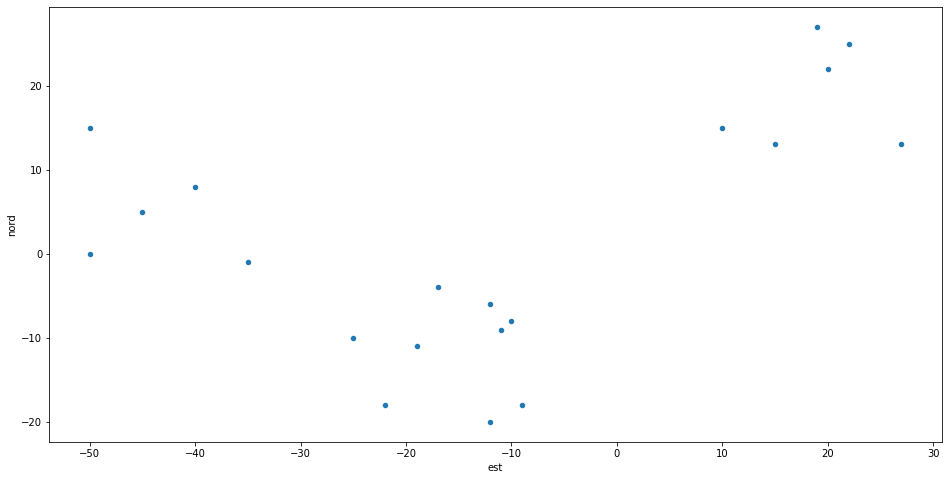

In [9]:
  ax = adresse_df.plot(kind='scatter', x='est', y='nord', figsize=(16,8))
    


# Recuperer les positions nord et est

In [10]:
from sklearn.cluster import KMeans
sample = adresse_df[['nord','est']]
sample.head()


,nord,est
0,0,-50
1,15,-50
2,5,-45
3,8,-40
4,-1,-35


# Exploiter les clusters

In [11]:
#Trouver les centroides pour les clusters
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(sample)
print(clusters.cluster_centers_ )

[[ 19.16666667  18.83333333]
 [-11.55555556 -15.22222222]
 [  5.4        -44.        ]]


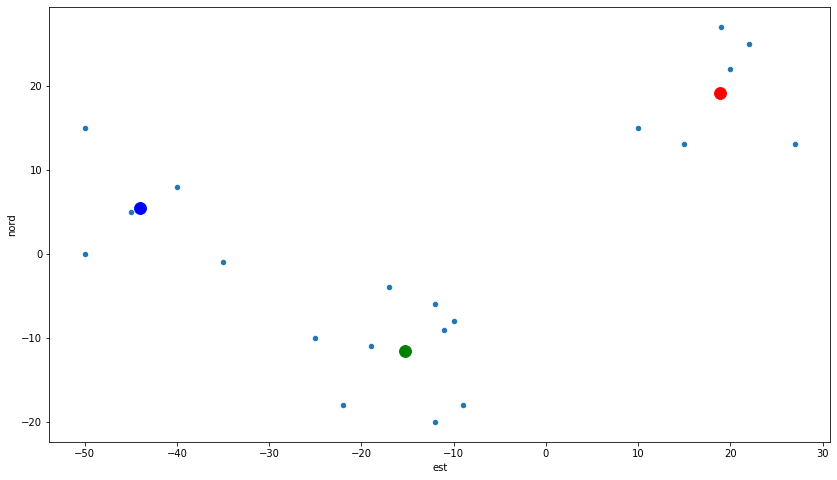

In [12]:
# Afficher les centroides en utilisant les couleurs
 
import matplotlib.pyplot as plt
ax = adresse_df.plot(kind='scatter', x='est', y='nord', figsize=(14,8))
plt.scatter(clusters.cluster_centers_[0][1], clusters.cluster_centers_[0][0], s = 140, color = 'red')
plt.scatter(clusters.cluster_centers_[1][1], clusters.cluster_centers_[1][0], s = 140, color = 'green')
plt.scatter(clusters.cluster_centers_[2][1], clusters.cluster_centers_[2][0], s = 140, color = 'blue')
plt.show()  

In [13]:
# Trouver le nombre elements dans le cluster
clusters = KMeans(n_clusters=3)
sample['cluster'] = clusters.fit_predict(sample)
sample.cluster.value_counts()

0    9
1    6
2    5
Name: cluster, dtype: int64

# Emplacements pour 2 rencontres

In [14]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(sample)
print(clusters.cluster_centers_)

[[ -5.5        -25.5          0.71428571]
 [ 19.16666667  18.83333333   1.        ]]


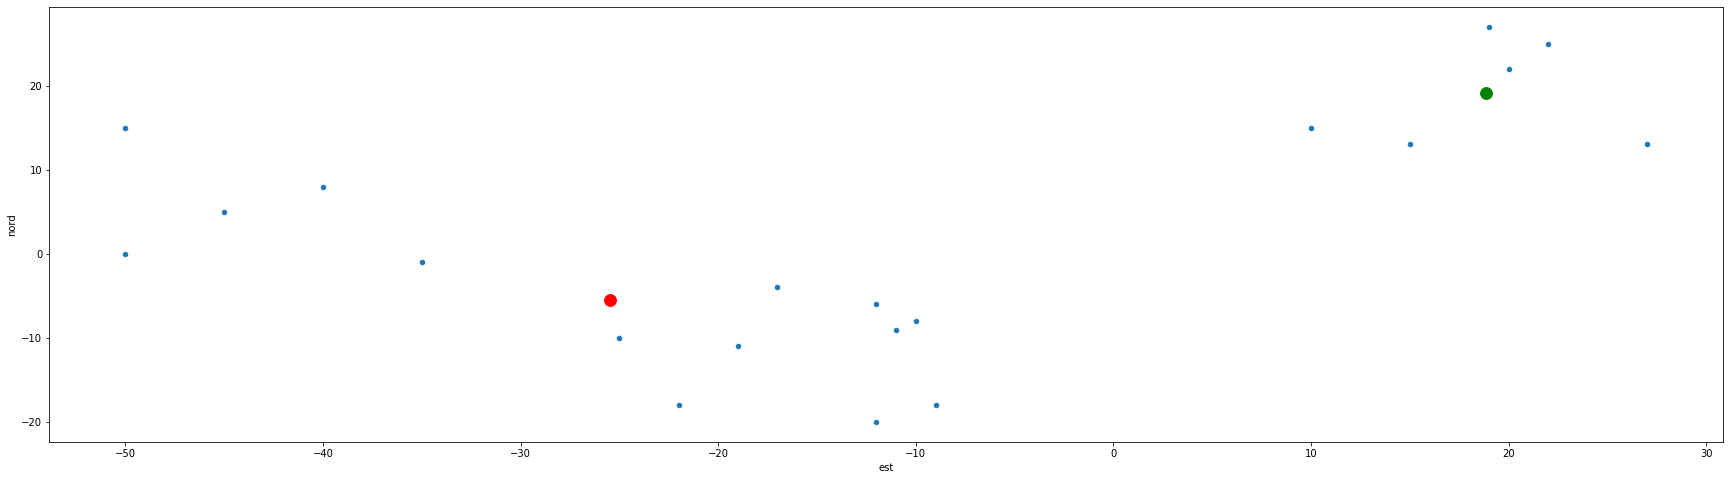

In [15]:
# afficher les deux centroides
 
import matplotlib.pyplot as plt

ax = adresse_df.plot(kind='scatter', x='est', y='nord', figsize=(30,8))
plt.scatter(clusters.cluster_centers_[0][1], clusters.cluster_centers_[0][0], s = 140, color = 'red')
plt.scatter(clusters.cluster_centers_[1][1], clusters.cluster_centers_[1][0], s = 140, color = 'green')
 
plt.show()  



In [16]:
# trouver le nombre elements dans le cluster
clusters = KMeans(n_clusters=2)
sample['cluster'] = clusters.fit_predict(sample)
sample.cluster.value_counts()

0    14
1     6
Name: cluster, dtype: int64

# Trouver la valeur idéale de k avec elbow

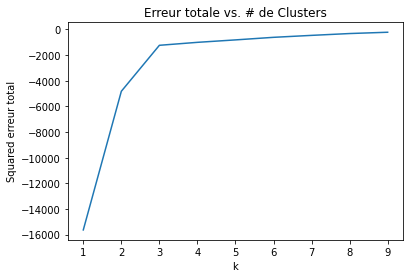

In [17]:
from matplotlib import  pyplot as plt
ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in ks]
score = [km[i].fit(sample).score(sample) for i in range(len(km))]

 
# Afficher le graphe pour 1 à len(inputs) clusters
plt.plot(ks, score)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Squared erreur total")
plt.title("Erreur totale vs. # de Clusters")
plt.show()

# K avec silhouette

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#Def: A higher Silhouette Coefficient indicates that the object is well matched to its own cluster 
#and poorly matched to neighboring clusters.

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(sample)
    label = kmeans.labels_
    sil_coeff = silhouette_score(sample, label, metric='euclidean')
    print("Pour n_clusters={},   Silhouette Coefficient est {}".format(n_cluster, sil_coeff))
    


Pour n_clusters=2,   Silhouette Coefficient est 0.6368478675194815
Pour n_clusters=3,   Silhouette Coefficient est 0.6854471711663955
Pour n_clusters=4,   Silhouette Coefficient est 0.5292919704737677
Pour n_clusters=5,   Silhouette Coefficient est 0.4416597558924355
Pour n_clusters=6,   Silhouette Coefficient est 0.49355055231011
Pour n_clusters=7,   Silhouette Coefficient est 0.41489797809102774
Pour n_clusters=8,   Silhouette Coefficient est 0.44186047690796304
Pour n_clusters=9,   Silhouette Coefficient est 0.4339661776923953


In [19]:
#Conclusion: k=3 est interessant et c'est le nombre optimal.